# Exercise 5 Tasks

## Linear Regression

A linear regression model for a dataset $\{(x_i, y_i) \in \mathbb{R}^2\}_{i=1}^{n}$ with one independent variable $x$ and one dependent variable $y$ estimates the dependent variable by the following formula.
$$\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} \cdot x_i$$

1. Which of the variables in that formula are learned when the model is fitted to the dataset?
2. Extend the model formula to a dataset $\{(x_{i1}, x_{i2}, x_{i3}, x_{i4}, y_i) \in \mathbb{R}^5\}_{i=1}^{n}$.
3. Rewrite the extended model formula as a single dot product between two vectors.

The absolute model error for a single data instance $(x_{i1}, x_{i2}, x_{i3}, x_{i4}, y_i)$ with prediction $\hat{y_i}$ is given by $|\hat{y_i} - y_i|$.

4. Write down the (unregularized) function that we aim to minimize when fitting a linear regression model to a dataset.
5. What is the most common way to fit a linear regression model in practise?

## Regularization

1. Look up regularization on (the english) Wikipedia. Which three goals of regularization does it mention in the first paragraph?
2. The lecture mentioned three regularization methods for linear regression models. Name them.
3. Which of the regularization goals according to Wikipedia do these regularization methods deal with?
4. The regularization methods from the lecture add a term to the loss function that only relies on the model parameters. Compare the influence of reducing a single parameter value by $1$ from (a) $50$ and (b) $1$ on each of the regularized loss functions. (Only consider the effect on the regularization part in the loss. Ignore the error term.)

## Linear Classification

Skip the following two code cells.
They just prepare the plots for later on and generate data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def plot_ground_truth(X, Y):
    fig = plt.figure(figsize=(12, 6))

    ax2 = fig.add_subplot(1, 2, 1)
    ax2.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], s=10, c="Red")
    ax2.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], s=10, c="Blue")
    # plt.plot([-1, 2], [-1, 2], c="Gray")
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_xlim(-0.25, 1.25)
    ax2.set_ylim(-0.25, 1.25)
    ax2.set_aspect("equal")
    ax2.set_title("Noisy Points with Classes - 2D View")
    ax2.legend(["Noisy Points of Class 1", "Noisy Points of Class 0"])

    ax1 = fig.add_subplot(1, 2, 2, projection="3d", computed_zorder=False)
    ax1.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], 1, s=10, c="Red", zorder=1)
    ax1.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], 0, s=10, c="Blue", zorder=-1)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_zlabel("y")
    ax1.set_xlim(-0.25, 1.25)
    ax1.set_ylim(-0.25, 1.25)
    ax1.set_aspect("equal")
    ax1.set_title("Noisy Points with Classes - 3D View")
    ax1.legend(["Noisy Points of Class 1", "Noisy Points of Class 0"])
    ax1.view_init(elev=20, azim=-115)

    plt.show()


def plot_linear_model_preds(X, Y_pred_in, xlim_left=-0.25, xlim_right=1.25, ylim_bottom=-0.25, ylim_top=1.25):
    plane_x1 = [xlim_left, xlim_right]
    plane_x2 = [ylim_bottom, ylim_top]
    plane_x1, plane_x2 = np.meshgrid(plane_x1, plane_x2)
    plane_y = 0.5

    fig = plt.figure(figsize=(18, 6))

    ax2 = fig.add_subplot(1, 3, 1)
    ax2.scatter(X[:, 0], X[:, 1], s=10, c=Y_pred_in)
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_xlim(xlim_left, xlim_right)
    ax2.set_ylim(ylim_bottom, ylim_top)
    ax2.set_aspect("equal")
    ax2.set_title("Points with Regression Prediction - 2D View")

    ax1 = fig.add_subplot(1, 3, 2, projection="3d", computed_zorder=False)
    ax1.scatter(X[Y_pred_in > plane_y][:, 0], X[Y_pred_in > plane_y][:, 1], Y_pred_in[Y_pred_in > plane_y], s=10, c=Y_pred_in[Y_pred_in > plane_y], zorder=1, vmin=np.min(Y_pred_in))
    ax1.scatter(X[Y_pred_in <= plane_y][:, 0], X[Y_pred_in <= plane_y][:, 1], Y_pred_in[Y_pred_in <= plane_y], s=10, c=Y_pred_in[Y_pred_in <= plane_y], zorder=-1, vmax=np.max(Y_pred_in))
    ax1.plot_surface(plane_x1, plane_x2, np.zeros_like(plane_x1) + plane_y, color=[0.5, 0.5, 0.5], alpha=0.75, zorder=0)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_zlabel("y-hat")
    ax1.set_xlim(xlim_left, xlim_right)
    ax1.set_ylim(ylim_bottom, ylim_top)
    ax1.set_aspect("equal")
    ax1.set_title("Points with Regression Prediction - 3D View")
    ax1.view_init(elev=20, azim=-115)

    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(X[Y_pred_in >= plane_y][:, 0], X[Y_pred_in >= plane_y][:, 1], s=10, c="Red")
    ax.scatter(X[Y_pred_in < plane_y][:, 0], X[Y_pred_in < plane_y][:, 1], s=10, c="Blue")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_xlim(xlim_left, xlim_right)
    ax.set_ylim(ylim_bottom, ylim_top)
    ax.set_aspect("equal")
    ax.set_title("Points with Classification Prediction - 2D View")
    ax.legend(["Points Predicted in Class 1", "Points Predicted in Class 0"])

    plt.show()


def plot_logistic_model_preds(X, Y_pred_in, xlim_left=-0.25, xlim_right=1.25, ylim_bottom=-0.25, ylim_top=1.25):
    plane_x1 = [xlim_left, xlim_right]
    plane_x2 = [ylim_bottom, ylim_top]
    plane_x1, plane_x2 = np.meshgrid(plane_x1, plane_x2)
    plane_y = 0.5

    fig = plt.figure(figsize=(18, 6))

    ax2 = fig.add_subplot(1, 3, 1)
    ax2.scatter(X[:, 0], X[:, 1], s=10, c=Y_pred_in)
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_xlim(xlim_left, xlim_right)
    ax2.set_ylim(ylim_bottom, ylim_top)
    ax2.set_aspect("equal")
    ax2.set_title("Points with Regression Prediction - 2D View")

    ax1 = fig.add_subplot(1, 3, 2, projection="3d", computed_zorder=False)
    ax1.scatter(X[Y_pred_in > plane_y][:, 0], X[Y_pred_in > plane_y][:, 1], Y_pred_in[Y_pred_in > plane_y], s=10, c=Y_pred_in[Y_pred_in > plane_y], zorder=1, vmin=np.min(Y_pred_in))
    ax1.scatter(X[Y_pred_in <= plane_y][:, 0], X[Y_pred_in <= plane_y][:, 1], Y_pred_in[Y_pred_in <= plane_y], s=10, c=Y_pred_in[Y_pred_in <= plane_y], zorder=-1, vmax=np.max(Y_pred_in))
    ax1.plot_surface(plane_x1, plane_x2, np.zeros_like(plane_x1) + plane_y, color=[0.5, 0.5, 0.5], alpha=0.75, zorder=0)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_zlabel("y-hat")
    ax1.set_xlim(xlim_left, xlim_right)
    ax1.set_ylim(ylim_bottom, ylim_top)
    ax1.set_aspect("equal")
    ax1.set_title("Points with Regression Prediction - 3D View")
    ax1.view_init(elev=20, azim=-115)

    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(X[Y_pred_in >= plane_y][:, 0], X[Y_pred_in >= plane_y][:, 1], s=10, c="Red")
    ax.scatter(X[Y_pred_in < plane_y][:, 0], X[Y_pred_in < plane_y][:, 1], s=10, c="Blue")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_xlim(xlim_left, xlim_right)
    ax.set_ylim(ylim_bottom, ylim_top)
    ax.set_aspect("equal")
    ax.set_title("Points with Regression Prediction - 2D View")
    ax.legend(["Points Predicted in Class 1", "Points Predicted in Class 0"])

    plt.show()


def are_linear_predictions_equal(X, model, custom_func):
    model_Y_pred = model.predict(X)
    custom_Y_pred = np.apply_along_axis(custom_func, 1, X)

    epsilon = 1e-6
    if np.all(np.abs(custom_Y_pred - model_Y_pred) < epsilon):
        print("You got it right!")
    else:
        print("Not quite there yet. Try again!")


def are_logistic_predictions_equal(X, model, custom_func):
    model_Y_pred = model.predict_proba(X)[:, 1]
    custom_Y_pred = np.apply_along_axis(custom_func, 1, X)

    epsilon = 1e-6
    if np.all(np.abs(custom_Y_pred - model_Y_pred) < epsilon):
        print("You got it right!")
    else:
        print("Not quite there yet. Try again!")


def model_to_str(m):
    return f"y_pred = {m.intercept_:.4f}" + "".join([f" + {coef:.4f}*x_{i}" for i, coef in enumerate(m.coef_)])

In [2]:
beta = [0, -1, 1]
X_raw = np.random.uniform(0, 1, (1000, 2))
X = X_raw + np.random.normal(0, 0.1, (1000, 2))

Y_soft = np.array([np.dot(beta, [1, x1, x2]) for x1, x2 in X_raw])
Y = np.array([0 if y_soft < 0 else 1 for y_soft in Y_soft])

Let's look at a dataset with two independent variables $x_{i1}$ and $x_{i2}$.
The dependent variable $y_i$ takes on either the value $0$ or $1$ (i.e. $y_i \in \{0,1\}$).

The plot on the left side highlights the categorical nature of this data, ready to be classified.
The 3D plot shows that the points can also be represented three-dimensional with the values of $y_i$ as the third coordinate.

1. Even though it is a representation of the same (categorical) attribute $y$, can you think of a regression function for $y$ in the three-dimensional space? How would it look like geometrically?
(Hint: Think of a plane instead of a line this time.)

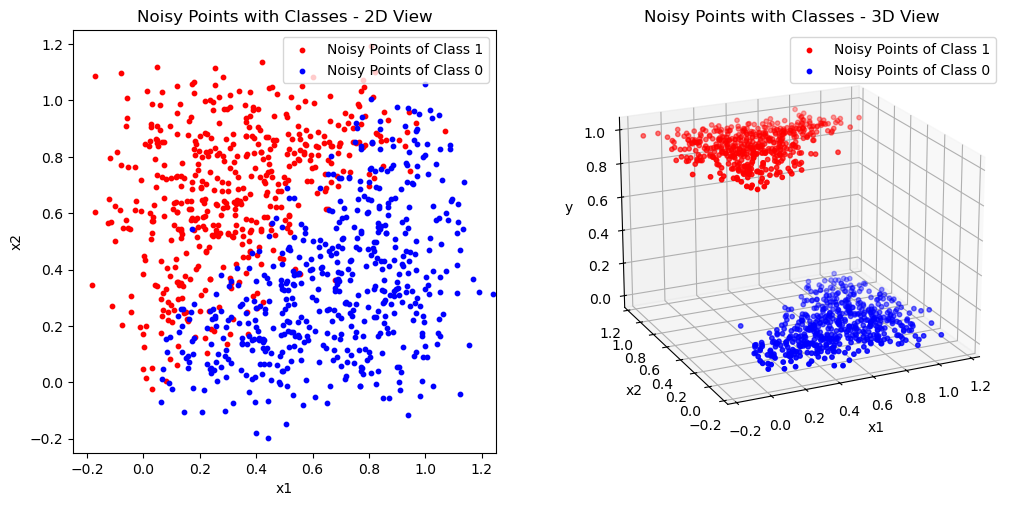

In [3]:
plot_ground_truth(X, Y)

Let's try this idea using `sklearn.linear_model.LinearRegression`.
This model is fitted according to the ordinary least squares solution of the linear regression model on the values of $x_{i1}$ and $x_{i2}$.

You can see the prediction results of the resulting model on the training data in the first plot of the code cell after the next.
The middle plot shows the points in 3D space where the heigh of the points is taken from the regression prediction $\hat{y}$.
You should be able to see that these points lie on the regression plane that you have described in the task above.

2. How can the gray plane in the 3D plot be used to get the classification result in the plot on the right?
3. The answer to the last question implies a decision boundary in the plot on the right. How does that look like?
4. BONUS: Can you describe that decision boundary from the regression plane and the gray plane in the 3D plot geometrically?

Side note:

This is similar to the actual implementation of `sklearn.linear_model.RidgeClassifier`, about which its documentation says:
> This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case).

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import zero_one_loss

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

zero_one_loss(Y, Y_pred > 0.5)

0.09399999999999997

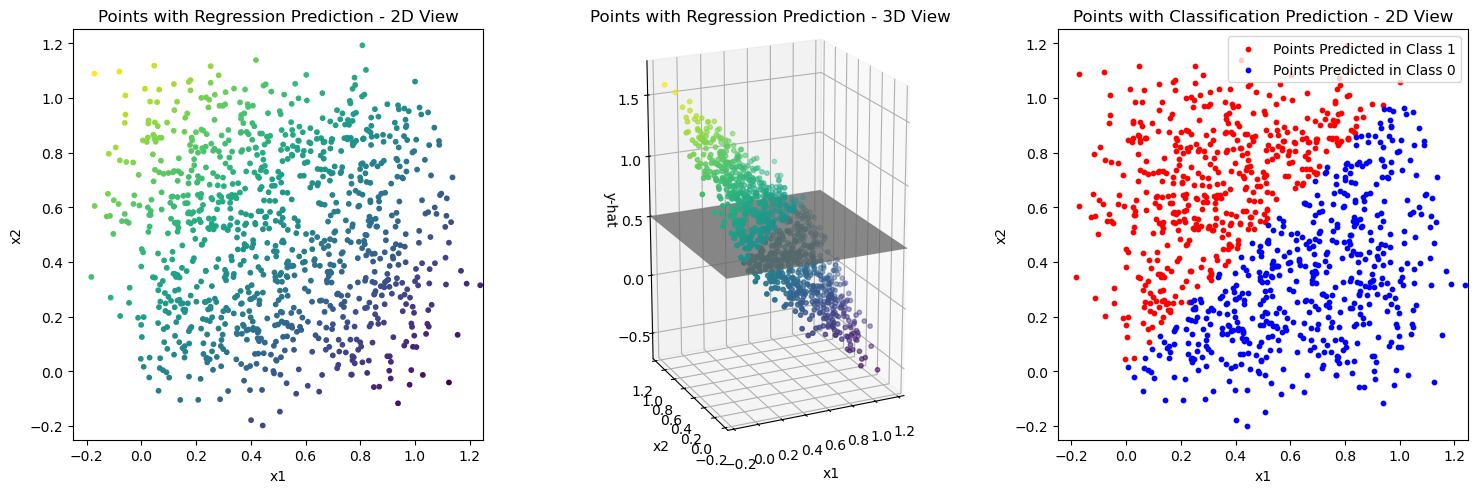

In [5]:
plot_linear_model_preds(X, Y_pred)

5. Implement the linear regression model in the function `linear_regression()`. The input variable `x` and the variable `beta_vec` contain all the values you need for the computation.

In [6]:
def linear_regressor(x):
    beta0 = model.intercept_
    beta1_n = model.coef_
    beta_vec = np.array([beta0, *beta1_n])

    # TODO: implement the linear regression model function for the parameters beta
    return None


# checking and plotting the solution
custom_Y_pred = np.apply_along_axis(linear_regressor, 1, X)

if not all(custom_Y_pred == None):
    plot_linear_model_preds(X, custom_Y_pred)
    are_linear_predictions_equal(X, model, linear_regressor)

... and that is how you can use a linear regression model for classification!

In the lecture you have heard about a problem with this approach when there is an outlier to the training data.
Have a look at that case in the next three code blocks.

This is what happens here on a high level:
1. Adding a single outlier point to the data.
2. Fitting a new linear regression model to that data.
3. Plotting the prediction results of that new model.

In [8]:
X_outlier = np.concat([X, [[10, 0]]])
Y_outlier = np.concat([Y, [1]])

In [9]:
model = LinearRegression()
model.fit(X_outlier, Y_outlier)

Y_pred = model.predict(X_outlier)

zero_one_loss(Y_outlier, Y_pred > 0.5)

0.1428571428571429

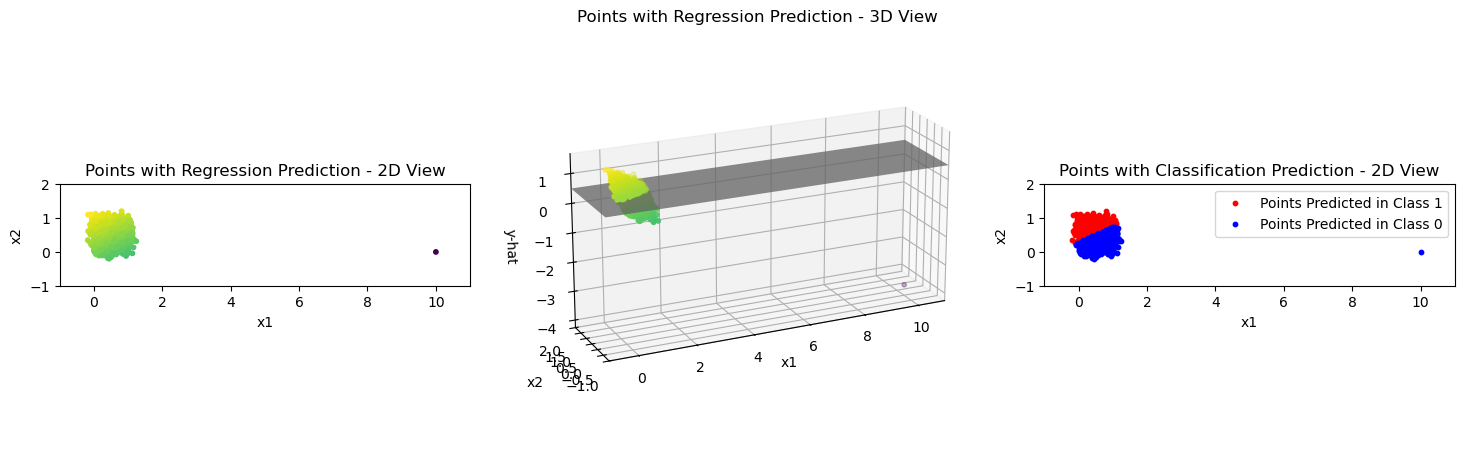

In [10]:
plot_linear_model_preds(X_outlier, Y_pred, xlim_left=-1, xlim_right=11, ylim_top=2, ylim_bottom=-1)

We can clearly see that the decision boundary is tilted towards the right now in the plot on the right and that the $0$-$1$ loss is larger now than before.

In the lecture it was claimed that an outlier does not have such a large effect on a logistic regression model.
See for yourself in the following two code blocks, where the model is trained and the results are plotted again.

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None)
model.fit(X_outlier, Y_outlier)

Y_pred = model.predict_proba(X_outlier)[:, 1]

zero_one_loss(Y_outlier, Y_pred > 0.5)

0.09290709290709287

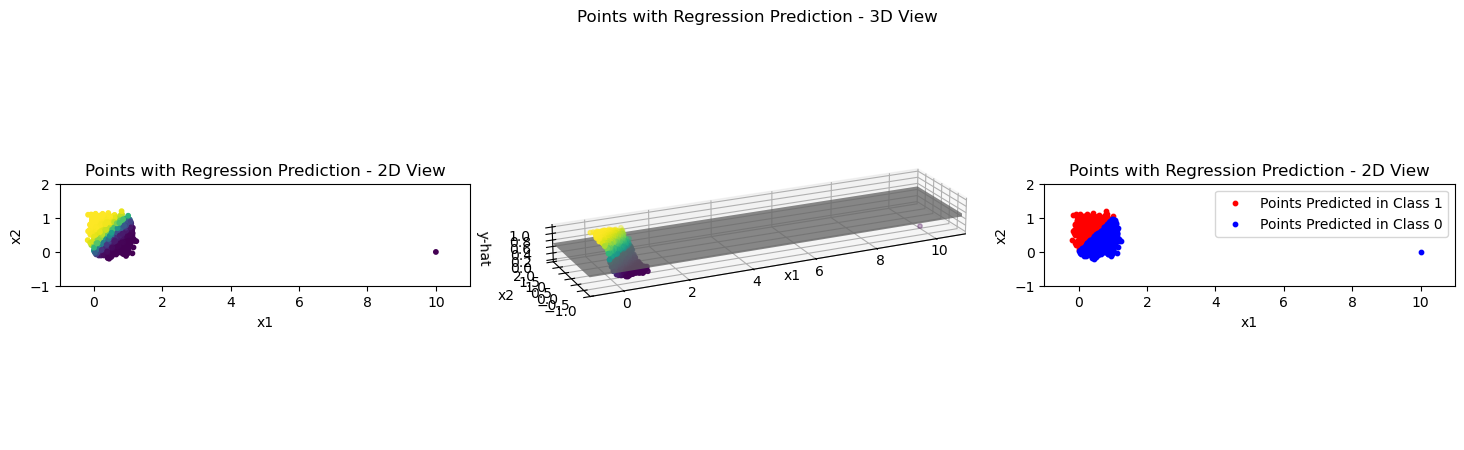

In [12]:
plot_logistic_model_preds(X_outlier, Y_pred, xlim_left=-1, xlim_right=11, ylim_top=2, ylim_bottom=-1)

This is caused by the different loss that is used for the optimization in logistic regression.
You are encouraged to think about how the different loss has a different influence on the fitting process.
The basic idea is that here wrongly predicted outliers are not penalized as much as with the sum of squared errors, which is used in the usual linear regression setting.
(Take it as a bonus task to compare the influence of an outlier on the logistic regression loss vs. the linear regression loss.)

Let's get an intuitive understanding of how this works by looking at the plots above.

6. In each of the 3D plots, where would the outlier be positioned with the $y_i$ value from ground truth instead of from the model prediction?
7. Compare the ground truth-based position of the outlier to the predicted positions. Which case (linear or logistic) indicates a higher deviation of the model from ground truth? How does that influence the optimization on an intuitive level?

Enough with the comparison between linear and logistic regression for now.
Let's have a look at just the logistic regression model!

For that, a logistic regression model is trained and visualized on the data without the outlier in the following two code cells. (Just like the linear regression model in the beginning.)

In [13]:
model = LogisticRegression(penalty=None)
model.fit(X, Y)

Y_pred = model.predict_proba(X)[:, 1]

zero_one_loss(Y, Y_pred > 0.5)

0.09299999999999997

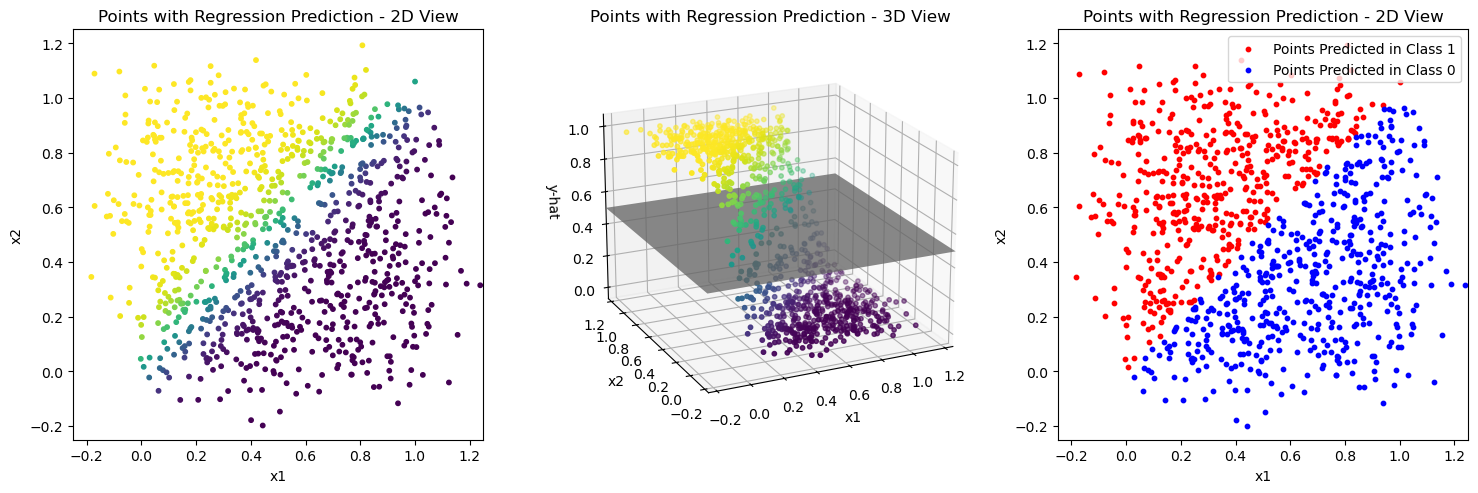

In [14]:
plot_logistic_model_preds(X, Y_pred)

8. Implement the linear regression model in the function `linear_regression()`. The input variable `x` and the variable `beta_vec` contain all the values you need for the computation.

In [15]:
def logistic_regressor(x):
    beta0 = model.intercept_
    beta1_n = model.coef_
    beta_vec = np.array([beta0[0], *beta1_n[0]])

    # TODO: implement the logistic regression model function for the parameters beta
    return None


# checking and plotting the solution
custom_Y_pred = np.apply_along_axis(logistic_regressor, 1, X)

if not all(custom_Y_pred == None):
    plot_logistic_model_preds(X, custom_Y_pred)
    are_logistic_predictions_equal(X, model, logistic_regressor)

In the lecture it was also mentioned that logistic regression models can struggle with data that is actually linearly separable.

9. Fill in the variable values `X_sep` and `Y_sep` with linearly separable data to see what happens to the model parameters below.

Side note:

The logistic regression optimizer of sklearn really had to be forced into showing this behaviour, because they implemented it pretty robustly against this case.
Check out the parameters to `LogisticRegression()` below to see what had to be done in order to disable `sklearn`'s safeguards.

In [18]:
X_sep = []
Y_sep = []

if not (len(X_sep) == 0 and len(Y_sep) == 0):
    model = LogisticRegression(penalty=None, max_iter=1000, tol=0)
    model.fit(X_sep, Y_sep)

    print(model.coef_)
    print(model.intercept_)